In [1]:
%matplotlib inline
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
warnings.filterwarnings('ignore')

In [34]:
with pd.HDFStore('results.h5') as store:
    perplexity = store.get('perplexity')

## Perplexity

In [35]:
perplexity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 15
Data columns (total 8 columns):
vocab_size    496 non-null int64
test_vocab    496 non-null int64
min_df        496 non-null int64
max_df        496 non-null float64
binary        496 non-null bool
num_topics    496 non-null int64
passes        496 non-null int64
perplexity    496 non-null float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 31.5 KB


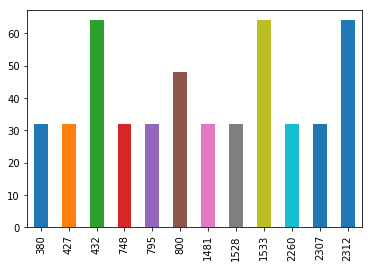

In [36]:
perplexity.vocab_size.value_counts().sort_index().plot.bar();

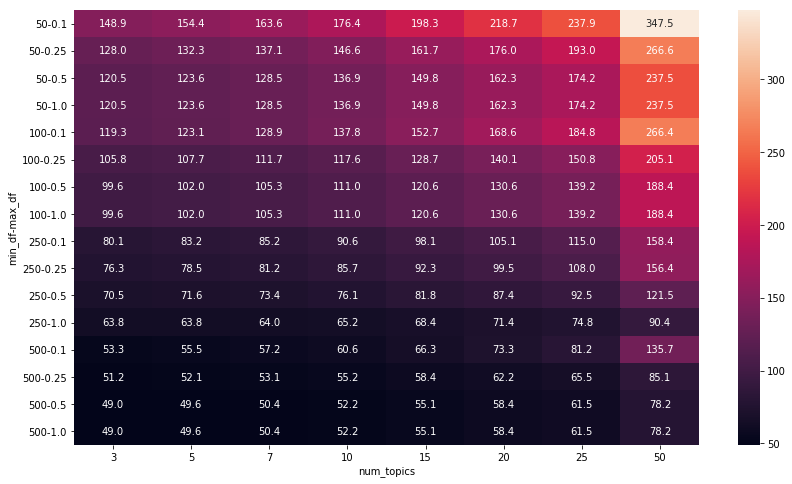

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(perplexity.groupby(['min_df', 'max_df', 'num_topics']).perplexity.mean().unstack(), annot=True, fmt='.1f');

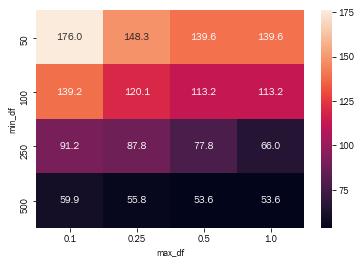

In [106]:
# fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(perplexity.groupby(['min_df', 'max_df']).perplexity.median().unstack(), annot=True, fmt='.1f');

In [9]:
perplexity.head()

,vocab_size,test_vocab,min_df,max_df,binary,num_topics,passes,perplexity
0,2260,68507,50,0.1,True,3,25,158.407376
1,2260,68507,50,0.1,True,5,25,165.615328
2,2260,68507,50,0.1,True,3,1,165.770189
3,2260,68507,50,0.1,True,7,25,173.805838
4,2260,68507,50,0.1,True,5,1,175.952406


In [ ]:
perplexity[perplexity.passes == 25].dro

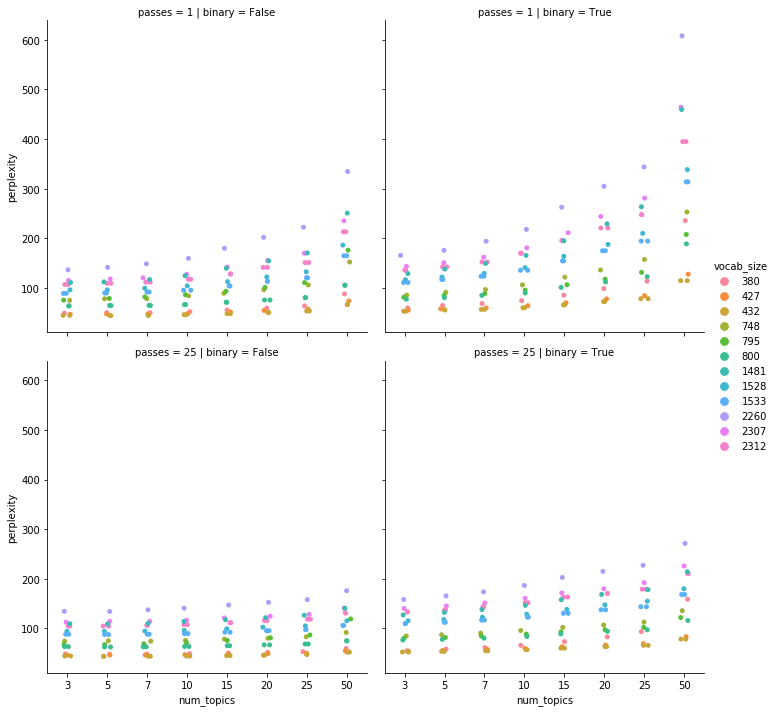

In [8]:
sns.catplot(x='num_topics',
            y='perplexity',
            data=perplexity,
            hue='vocab_size',
            col='binary',
            row='passes',
            kind='strip');

In [108]:
perplexity.head()

,vocab_size,test_vocab,min_df,max_df,binary,num_topics,passes,perplexity
0,427,50157,500,0.25,False,7,25,46.476374
1,427,50157,500,0.25,False,5,25,46.497385
2,427,50157,500,0.25,False,3,25,46.714096
3,427,50157,500,0.25,False,10,25,47.171538
4,427,50157,500,0.25,False,3,1,47.341729


In [109]:
X = perplexity[['min_df', 'max_df', 'binary', 'num_topics']]
X = pd.get_dummies(X, columns=X.columns, drop_first=True)
ols = sm.OLS(endog=perplexity.perplexity, exog=sm.add_constant(X))
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             perplexity   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     94.86
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          2.01e-128
Time:                        09:32:49   Log-Likelihood:                -2446.3
No. Observations:                 496   AIC:                             4923.
Df Residuals:                     481   BIC:                             4986.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           145.3325      5.908     24.601

## Coherence

In [85]:
with pd.HDFStore('results.h5') as store:
    coherence = store.get('coherence')
coherence.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100 entries, 0 to 99
Data columns (total 13 columns):
num_topics    3100 non-null int64
passes        3100 non-null object
10            620 non-null float64
15            930 non-null float64
20            1240 non-null float64
25            1550 non-null float64
3             186 non-null float64
5             310 non-null float64
50            3100 non-null float64
7             434 non-null float64
min_df        3100 non-null int64
max_df        3100 non-null float64
binary        3100 non-null bool
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 317.9+ KB


In [86]:
coherence_long = pd.melt(coherence, 
                         id_vars=['num_topics', 'passes', 'min_df', 'max_df', 'binary'], 
                         var_name='model',
                         value_name='coherence').dropna()
coherence_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 0 to 24713
Data columns (total 7 columns):
num_topics    8370 non-null int64
passes        8370 non-null object
min_df        8370 non-null int64
max_df        8370 non-null float64
binary        8370 non-null bool
model         8370 non-null object
coherence     8370 non-null float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 465.9+ KB


In [59]:
X = coherence_long.drop('coherence', axis=1)
X = pd.get_dummies(X, columns=X.columns, drop_first=True)
ols = sm.OLS(endog=coherence_long.coherence, exog=sm.add_constant(X))
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              coherence   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     257.7
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:47:03   Log-Likelihood:                -4925.0
No. Observations:                8370   AIC:                             9980.
Df Residuals:                    8305   BIC:                         1.044e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5492      0.029    -52.776

In [ ]:
coherence_long.model = coherence_long.model.apply(lambda x: f'model_{int(x):0>2}')

/Users/Stefan/.pyenv/versions/3.6.5/envs/at-3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


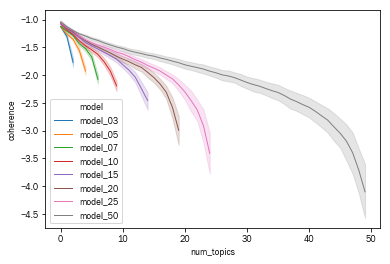

In [88]:
sns.lineplot(x='num_topics', y='coherence', hue='model', data=coherence_long.sort_values('model'));